# COGS 108 - Final Project 

## Permissions

# Overview

Our primary goal in our research is to look through the available data and determine whether there is a disparity in overall health and mortality for Americans residing in various communities, ranging from infancy to adulthood. We also take into account some predictive factors, such as smoking, binge drinking, physical activity, and insurance coverage to measure their effects on these values.

# Names

- Sean Reynolds
- Kari Garcia
- Sam Kapusta
- Tam Tran
- Randy Kim

# Research Question

How does living in a larger metropolitan area affect the health of individuals residing in those areas (i.e. Do the populations in these cities have better or worse overall health and mortality than smaller populations)?

## Background and Prior Work

According to the CDC, several of the leading health conditions affecting mortality rates in the United States are preventable.(1)  In that same article, the CDC notes that rural populations are older and sicker than urban populations.  Some explanations behind that include poor habits, less physical activity, and restricted access to healthcare. Our goal is to take these different factors into consideration when performing our analysis.

While there are many factors in determining individual risks, we seek to utilize our analysis to further educate ourselves on whether living in different populations bare any relation. Additionally, we hope our research provides some insight on where Americans need to focus their effort on when it comes to improving public health wherever they reside.

References (include links):
- 1) https://www.cdc.gov/media/releases/2017/p0112-rural-death-risk.html
- 2) https://www.census.gov/library/stories/2017/11/income-poverty-rural-america.html

# Hypothesis


We hypothesize that individuals living in larger cities would be rated in poorer overall health as opposed to those residing in smaller, less populated cities. Some potential reasons would include low air quality (smog), higher rates of poverty, and insufficient health coverage.

We will be focusing our data analysis on the following variables provided in our dataset: Poor or fair health, life expectancy, infant mortality, diabetes prevalence, drug overdose deaths, HIV prevalence, flu vaccinations, adult obesity, adult smoking, insufficient sleep, excessive drinking, physical inactivity, and uninsured.

# Dataset(s)

- Dataset Name: County Health Rankings: 2019 CHR CSV Analytic Data
- Link to the dataset: https://www.countyhealthrankings.org/sites/default/files/media/document/analytic_data2019.csv
- Dataset Website: https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/2020-measures
- Number of observations: 3195
- Description: This dataset has different health indicators such as 'Premature death raw value', 'Premature death numerator', 'Premature death denominator', and more. Additionally, it has observations by diffferent counties.


- Dataset Name: CDC: NCHS Urban-Rural Classification Scheme for Counties
- Link to the dataset: https://www.cdc.gov/nchs/data/data_acces_files/NCHSurbruralcodes2013.sas7bdat
- Dataset website: https://www.cdc.gov/nchs/data_access/urban_rural.htm
- Number of observations: 3149
- Description: This dataset also has observations by diffferent counties, and it has different codes corresponding  to certain population types.

We are combining these datasets to group information about health conditions in different counties from the CHR dataset and categorize them by their urban and rural rankings from the CDC dataset.

# Setup

We imported the numpy, pandas, matplotlib, and seaborn libraries to aid us in our analysis. The data we worked with is stored in a Pandas DataFrame.

## Loading in the data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, kstest

pd.options.mode.chained_assignment = None  # default='warn'
#pd.options.display.max_columns = None

# read_csv automatically uncompresses zip files. Alternate strategy is to use zipfile library
health_df = pd.read_csv('analytic_data2019.csv', low_memory=False)
county_df = pd.read_csv('NCHSURCodes2013.csv')

In [2]:
health_df['County name'] = health_df['Name']

health_df

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,County name
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue,county
1,00,000,00000,US,United States,2019,NaN,6900.630354,3745538,908266078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,80440,13636816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alabama
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autauga County
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baldwin County
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,451,72222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barbour County
6,01,007,01007,AL,Bibb County,2019,1,11783.543675,445,63653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bibb County
7,01,009,01009,AL,Blount County,2019,1,10908.101822,1050,161107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blount County
8,01,011,01011,AL,Bullock County,2019,1,12066.910263,205,29266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bullock County
9,01,013,01013,AL,Butler County,2019,1,14018.606262,393,54804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Butler County


In [3]:
county_df

,FIPS code,State Abr.,County name,CBSA title,CBSA 2012 pop,County 2012 pop,2013 code,2006 code,1990-based code
0,1001,AL,Autauga County,"Montgomery, AL",377149,55514,3,3,3
1,1003,AL,Baldwin County,"Daphne-Fairhope-Foley, AL",190790,190790,4,5,3
2,1005,AL,Barbour County,NaN,.,27201,6,5,5
3,1007,AL,Bibb County,"Birmingham-Hoover, AL",1136650,22597,2,2,6
4,1009,AL,Blount County,"Birmingham-Hoover, AL",1136650,57826,2,2,3
5,1011,AL,Bullock County,NaN,.,10474,6,6,6
6,1013,AL,Butler County,NaN,.,20307,6,6,6
7,1015,AL,Calhoun County,"Anniston-Oxford-Jacksonville, AL",117296,117296,4,4,4
8,1017,AL,Chambers County,"Valley, AL",34064,34064,5,5,6
9,1019,AL,Cherokee County,NaN,.,26021,6,6,6


In [4]:
df = pd.merge(health_df, county_df, on='County name')

In [5]:
health_df.columns

Index(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name', 'Release Year',
       'County Ranked (Yes=1/No=0)', 'Premature death raw value',
       'Premature death numerator', 'Premature death denominator',
       ...
       'Male population 45-64 raw value', 'Male population 65+ raw value',
       'Total male population raw value', 'Female population 0-17 raw value',
       'Female population 18-44 raw value',
       'Female population 45-64 raw value', 'Female population 65+ raw value',
       'Total female population raw value', 'Population growth raw value',
       'County name'],
      dtype='object', length=535)

In [6]:
county_df.columns

Index(['FIPS code', 'State Abr.', 'County name', 'CBSA title', 'CBSA 2012 pop',
       'County 2012 pop', '2013 code', '2006 code', '1990-based code'],
      dtype='object')

In [7]:
df['Drug overdose deaths raw value'] 

0        9.6230761366
1        16.322611618
2        16.322611618
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9        22.093263028
10       22.093263028
11       11.320516477
12       11.320516477
13       24.799584751
14       24.799584751
15       31.359173984
16       31.359173984
17                NaN
18                NaN
19                NaN
20                NaN
21                NaN
22                NaN
23                NaN
24                NaN
25                NaN
26                NaN
27                NaN
28                NaN
29                NaN
             ...     
14492    12.326909644
14493    32.852567463
14494             NaN
14495    11.194770959
14496    10.204351589
14497             NaN
14498             NaN
14499    20.297087965
14500    7.9471702397
14501    18.791890255
14502             NaN
14503    11.354328027
14504    19.056418548
14505             NaN
14506    1

The code above loads in two different data sets, the data on health statistics  for each county in the U.S. and the other for showing what type of population each county is classified as. Once the data sets are loaded in, we merged the two datasets on the 'County name' column.

## Cutting down the dataframe

Since our dataset has too many variables(columns) that we don't need, we're going to pick out the variables that are the most relevant to our analysis.

In [8]:
df = df[['County name', '2013 code', 'Poor or fair health raw value', 'Life expectancy raw value', 'Infant mortality raw value', 'Diabetes prevalence raw value', 'Drug overdose deaths raw value', 'HIV prevalence raw value', 'Flu vaccinations raw value', 'Adult obesity raw value', 'Adult smoking raw value', 'Insufficient sleep raw value', 'Excessive drinking raw value','Physical inactivity raw value', 'Uninsured raw value', 'Homicides raw value', 'Firearm fatalities raw value', 'Residential segregation - non-white/white raw value', 'Frequent physical distress raw value', 'Frequent mental distress raw value']]

In [9]:
df

,County name,2013 code,Poor or fair health raw value,Life expectancy raw value,Infant mortality raw value,Diabetes prevalence raw value,Drug overdose deaths raw value,HIV prevalence raw value,Flu vaccinations raw value,Adult obesity raw value,Adult smoking raw value,Insufficient sleep raw value,Excessive drinking raw value,Physical inactivity raw value,Uninsured raw value,Homicides raw value,Firearm fatalities raw value,Residential segregation - non-white/white raw value,Frequent physical distress raw value,Frequent mental distress raw value
0,Autauga County,3,0.1841112436,76.330589011,7.6992753623,0.142,9.6230761366,225.5,0.41,0.375,0.191246585,0.3590540606,0.1687801512,0.311,0.085009665,5.2,17.7,27.14756927,0.1282443447,0.1263835707
1,Baldwin County,4,0.1806045782,78.599497656,5.8513374486,0.113,16.322611618,163.9,0.45,0.31,0.1679548515,0.3330586814,0.1671496869,0.238,0.1069928804,2.9,14.4,33.240059197,0.1262200157,0.1282255819
2,Baldwin County,5,0.1806045782,78.599497656,5.8513374486,0.113,16.322611618,163.9,0.45,0.31,0.1679548515,0.3330586814,0.1671496869,0.238,0.1069928804,2.9,14.4,33.240059197,0.1262200157,0.1282255819
3,Baldwin County,4,0.2350329359,75.244220557,9.9875156055,0.124,NaN,319.9,0.4,0.341,0.2410759283,0.3861825744,0.1397612912,0.239,0.150347537,9.1,23.3,16.801580617,0.149511436,0.1431755912
4,Baldwin County,5,0.2350329359,75.244220557,9.9875156055,0.124,NaN,319.9,0.4,0.341,0.2410759283,0.3861825744,0.1397612912,0.239,0.150347537,9.1,23.3,16.801580617,0.149511436,0.1431755912
5,Barbour County,6,0.2577341563,75.77945737,NaN,0.18,NaN,436,0.37,0.443,0.2154087757,0.3856316713,0.1269871542,0.282,0.1251319664,7,15.2,24.31376525,0.1621615961,0.1463231059
6,Barbour County,6,0.2577341563,75.77945737,NaN,0.18,NaN,436,0.37,0.443,0.2154087757,0.3856316713,0.1269871542,0.282,0.1251319664,7,15.2,24.31376525,0.1621615961,0.1463231059
7,Barbour County,6,0.2446104682,76.437139837,NaN,0.168,NaN,110.1,0.28,0.393,0.2325190522,0.3963743803,0.120231635,0.312,0.0720151611,NaN,13.2,34.342650909,0.1642065675,0.1630094747
8,Barbour County,6,0.2446104682,76.437139837,NaN,0.168,NaN,110.1,0.28,0.393,0.2325190522,0.3963743803,0.120231635,0.312,0.0720151611,NaN,13.2,34.342650909,0.1642065675,0.1630094747
9,Bibb County,2,0.1999691186,73.928271076,14.792899408,0.149,22.093263028,191.9,0.39,0.378,0.1991640424,0.381488654,0.1592515079,0.349,0.0968007528,8.2,21.3,38.49942387,0.1316296828,0.1285403606


In [10]:
df.dtypes

County name                                            object
2013 code                                               int64
Poor or fair health raw value                          object
Life expectancy raw value                              object
Infant mortality raw value                             object
Diabetes prevalence raw value                          object
Drug overdose deaths raw value                         object
HIV prevalence raw value                               object
Flu vaccinations raw value                             object
Adult obesity raw value                                object
Adult smoking raw value                                object
Insufficient sleep raw value                           object
Excessive drinking raw value                           object
Physical inactivity raw value                          object
Uninsured raw value                                    object
Homicides raw value                                    object
Firearm 

As of now, our variables are being stored in the dataframe as incorrect data types, but we will fix that in the <b>Data Cleaning</b> section.

In [11]:
pd.set_option('display.max_rows', 19)
n_nan = df.loc[:, :].isnull().sum()
n_nan

County name                                               0
2013 code                                                 0
Poor or fair health raw value                             0
Life expectancy raw value                               184
Infant mortality raw value                             8729
Diabetes prevalence raw value                             0
Drug overdose deaths raw value                         6306
HIV prevalence raw value                               2795
Flu vaccinations raw value                               15
                                                       ... 
Insufficient sleep raw value                              0
Excessive drinking raw value                              0
Physical inactivity raw value                             0
Uninsured raw value                                       1
Homicides raw value                                    8829
Firearm fatalities raw value                           3915
Residential segregation - non-white/whit

There are a lot of NaN entries in our dataframe, but we still want to keep any observations with NaN entries since their other variables will help in our analysis.

# Data Cleaning

## Mapping county codes

The '2013 code' column in our dataframe carries numerical codes that correspond to a certain population type, which is important in our analysis for classifying the different population sizes that each observation falls under.

In [12]:
def convert_2013_code(code):
    if code == 1:
        code = 'LCM' # Large Central Metro
    elif code == 2:
        code = 'LFM' # Large Fringe Metro
    elif code == 3:
        code = 'MM' # Medium Metro
    elif code == 4:
        code = 'SM' # Small Metro
    elif code == 5:
        code = 'MI' # Micropolitan
    elif code == 6:
        code = 'NC' # Non-Core
    else:
        code = code
    
    return code

In [13]:
df['County Classification'] = df.loc[:,'2013 code'].apply(convert_2013_code)

df

,County name,2013 code,Poor or fair health raw value,Life expectancy raw value,Infant mortality raw value,Diabetes prevalence raw value,Drug overdose deaths raw value,HIV prevalence raw value,Flu vaccinations raw value,Adult obesity raw value,...,Insufficient sleep raw value,Excessive drinking raw value,Physical inactivity raw value,Uninsured raw value,Homicides raw value,Firearm fatalities raw value,Residential segregation - non-white/white raw value,Frequent physical distress raw value,Frequent mental distress raw value,County Classification
0,Autauga County,3,0.1841112436,76.330589011,7.6992753623,0.142,9.6230761366,225.5,0.41,0.375,...,0.3590540606,0.1687801512,0.311,0.085009665,5.2,17.7,27.14756927,0.1282443447,0.1263835707,MM
1,Baldwin County,4,0.1806045782,78.599497656,5.8513374486,0.113,16.322611618,163.9,0.45,0.31,...,0.3330586814,0.1671496869,0.238,0.1069928804,2.9,14.4,33.240059197,0.1262200157,0.1282255819,SM
2,Baldwin County,5,0.1806045782,78.599497656,5.8513374486,0.113,16.322611618,163.9,0.45,0.31,...,0.3330586814,0.1671496869,0.238,0.1069928804,2.9,14.4,33.240059197,0.1262200157,0.1282255819,MI
3,Baldwin County,4,0.2350329359,75.244220557,9.9875156055,0.124,NaN,319.9,0.4,0.341,...,0.3861825744,0.1397612912,0.239,0.150347537,9.1,23.3,16.801580617,0.149511436,0.1431755912,SM
4,Baldwin County,5,0.2350329359,75.244220557,9.9875156055,0.124,NaN,319.9,0.4,0.341,...,0.3861825744,0.1397612912,0.239,0.150347537,9.1,23.3,16.801580617,0.149511436,0.1431755912,MI
5,Barbour County,6,0.2577341563,75.77945737,NaN,0.18,NaN,436,0.37,0.443,...,0.3856316713,0.1269871542,0.282,0.1251319664,7,15.2,24.31376525,0.1621615961,0.1463231059,NC
6,Barbour County,6,0.2577341563,75.77945737,NaN,0.18,NaN,436,0.37,0.443,...,0.3856316713,0.1269871542,0.282,0.1251319664,7,15.2,24.31376525,0.1621615961,0.1463231059,NC
7,Barbour County,6,0.2446104682,76.437139837,NaN,0.168,NaN,110.1,0.28,0.393,...,0.3963743803,0.120231635,0.312,0.0720151611,NaN,13.2,34.342650909,0.1642065675,0.1630094747,NC
8,Barbour County,6,0.2446104682,76.437139837,NaN,0.168,NaN,110.1,0.28,0.393,...,0.3963743803,0.120231635,0.312,0.0720151611,NaN,13.2,34.342650909,0.1642065675,0.1630094747,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


The code cells above are mapping the numerical values under the '2013 code' column to what kind of population types they represent. The following is a list of what population type each acronym represents.
    - LCM/1 = Large Central Metro
    - LFM/2 = Large Fringe Metro
    - MM/3 = Medium Metro
    - SM/4 = Small Metro
    - MI/5 = Micropolitan
    - NC/6 = Non-Core
    
  

## Converting data types

Our variables of analysis are measured numerically(floats) so they must be converted from strings to floats.

In [14]:
def convert_to_float(obj):
    if obj == str:
        obj = obj.strip()
    
    return float(obj)

In [15]:
df['Poor or fair health raw value'] = df['Poor or fair health raw value'].apply(convert_to_float)
df['Life expectancy raw value'] = df['Life expectancy raw value'].apply(convert_to_float)
df['Infant mortality raw value'] = df['Infant mortality raw value'].apply(convert_to_float)
df['Diabetes prevalence raw value'] = df['Diabetes prevalence raw value'].apply(convert_to_float)
df['Drug overdose deaths raw value'] = df['Drug overdose deaths raw value'].apply(convert_to_float)
df['HIV prevalence raw value'] = df['HIV prevalence raw value'].apply(convert_to_float)
df['Flu vaccinations raw value'] = df['Flu vaccinations raw value'].apply(convert_to_float)
df['Adult obesity raw value'] = df['Adult obesity raw value'].apply(convert_to_float)
df['Adult smoking raw value'] = df['Adult smoking raw value'].apply(convert_to_float)
df['Insufficient sleep raw value'] = df['Insufficient sleep raw value'].apply(convert_to_float)
df['Excessive drinking raw value'] = df['Excessive drinking raw value'].apply(convert_to_float)
df['Physical inactivity raw value'] = df['Physical inactivity raw value'].apply(convert_to_float)
df['Uninsured raw value'] = df['Uninsured raw value'].apply(convert_to_float)
df['Homicides raw value'] = df['Homicides raw value'].apply(convert_to_float)
df['Firearm fatalities raw value'] = df['Firearm fatalities raw value'].apply(convert_to_float)
df['Residential segregation - non-white/white raw value'] = df['Residential segregation - non-white/white raw value'].apply(convert_to_float)
df['Frequent physical distress raw value'] = df['Frequent physical distress raw value'].apply(convert_to_float)
df['Frequent mental distress raw value'] = df['Frequent mental distress raw value'].apply(convert_to_float)

In [16]:
df.dtypes

County name                                             object
2013 code                                                int64
Poor or fair health raw value                          float64
Life expectancy raw value                              float64
Infant mortality raw value                             float64
Diabetes prevalence raw value                          float64
Drug overdose deaths raw value                         float64
HIV prevalence raw value                               float64
Flu vaccinations raw value                             float64
                                                        ...   
Excessive drinking raw value                           float64
Physical inactivity raw value                          float64
Uninsured raw value                                    float64
Homicides raw value                                    float64
Firearm fatalities raw value                           float64
Residential segregation - non-white/white raw value    

# Data Analysis

## Population types

First, let's take a look at the distribution of the counts of each county by population type.

In [17]:
df_sample = df.groupby('County name', group_keys=False).apply(lambda df: df.sample(1))
df_sample.shape[0]

1866

The cell above shows that there are 1866 different counties in our data. Now let's take a look at how they are distributed by population type.

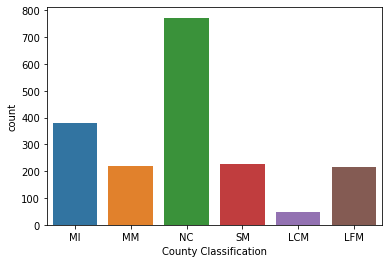

In [18]:
sns.countplot(x='County Classification', data=df_sample)
f1 = plt.gcf()

The histogram above shows that a large portion of counties in our data are considered Non-Core and Micropolitan which means the results for those population types will be more precise.

In our analysis, we will be separating observations into 3 different categories:
    1. Large population: consists of Large Central/Fringe Metro counties
    2. Medium population: consists of Medium/Small Metro counties
    3. Small population: consists of Micropolitan/Non-Core counties

In [19]:
large_pop_df = df[df['County Classification'].isin(['LCM', 'LFM'])]
medium_pop_df = df[df['County Classification'].isin(['MM', 'SM'])]
small_pop_df = df[df['County Classification'].isin(['MI', 'NC'])]

In [20]:
large_pop_df.describe()

,2013 code,Poor or fair health raw value,Life expectancy raw value,Infant mortality raw value,Diabetes prevalence raw value,Drug overdose deaths raw value,HIV prevalence raw value,Flu vaccinations raw value,Adult obesity raw value,Adult smoking raw value,Insufficient sleep raw value,Excessive drinking raw value,Physical inactivity raw value,Uninsured raw value,Homicides raw value,Firearm fatalities raw value,Residential segregation - non-white/white raw value,Frequent physical distress raw value,Frequent mental distress raw value
count,2018.000000,2018.000000,2008.000000,964.000000,2018.000000,1281.000000,1725.000000,2016.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,957.000000,1591.000000,1914.000000,2018.000000,2018.000000
mean,1.850347,0.168002,77.632732,6.458775,0.116625,22.538501,204.699768,0.426572,0.320151,0.177348,0.334176,0.175432,0.254444,0.099587,6.034692,13.972156,32.052265,0.117308,0.120782
std,0.356820,0.042843,2.796021,2.079580,0.025635,12.379896,255.184959,0.086820,0.045544,0.034592,0.040374,0.032266,0.052520,0.042795,5.243044,6.631750,12.656156,0.021904,0.017717
min,1.000000,0.082892,67.958718,2.321843,0.047000,4.470030,18.000000,0.080000,0.158000,0.071693,0.236942,0.092878,0.096000,0.020682,0.700000,1.700000,0.169576,0.069370,0.080346
25%,2.000000,0.135695,75.689665,4.822284,0.099000,13.748720,78.500000,0.380000,0.294000,0.151146,0.306822,0.152355,0.219250,0.064403,2.700000,9.400000,23.790263,0.100318,0.107667
50%,2.000000,0.161917,77.778541,6.171026,0.116000,19.265461,127.100000,0.440000,0.324000,0.174996,0.334373,0.174898,0.254000,0.093969,4.400000,13.000000,31.769146,0.114845,0.118888
75%,2.000000,0.194551,79.624968,7.753608,0.134000,28.529314,234.800000,0.490000,0.349000,0.202119,0.363187,0.197109,0.292000,0.128083,7.600000,17.500000,40.051431,0.132243,0.133419
max,2.000000,0.345652,91.007047,17.142857,0.201000,85.487650,2590.200000,0.620000,0.495000,0.292537,0.458932,0.280822,0.402000,0.274373,39.500000,51.100000,72.910662,0.191473,0.175169


In [21]:
medium_pop_df.describe()

,2013 code,Poor or fair health raw value,Life expectancy raw value,Infant mortality raw value,Diabetes prevalence raw value,Drug overdose deaths raw value,HIV prevalence raw value,Flu vaccinations raw value,Adult obesity raw value,Adult smoking raw value,Insufficient sleep raw value,Excessive drinking raw value,Physical inactivity raw value,Uninsured raw value,Homicides raw value,Firearm fatalities raw value,Residential segregation - non-white/white raw value,Frequent physical distress raw value,Frequent mental distress raw value
count,3298.000000,3298.000000,3273.000000,1532.000000,3298.000000,2046.000000,2826.000000,3297.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3297.000000,1480.000000,2557.000000,3109.000000,3298.000000,3298.000000
mean,3.503032,0.173221,77.304337,6.778518,0.118644,21.833899,182.222930,0.421608,0.324918,0.181275,0.333839,0.173321,0.259116,0.102568,5.984865,14.577669,32.102492,0.120188,0.123193
std,0.500067,0.044299,2.701575,2.038436,0.026191,11.758381,192.290339,0.089279,0.042701,0.034169,0.040821,0.033141,0.052302,0.043452,4.521403,6.190808,12.416754,0.022203,0.017870
min,3.000000,0.082892,67.745553,3.061615,0.042000,3.212149,18.000000,0.060000,0.143000,0.067354,0.230283,0.092878,0.084000,0.025498,0.800000,2.200000,0.169576,0.069370,0.080346
25%,3.000000,0.139919,75.492452,5.272828,0.100000,13.560504,77.200000,0.370000,0.299000,0.155076,0.305421,0.149780,0.226000,0.066489,3.000000,10.200000,24.370147,0.103296,0.110313
50%,4.000000,0.167604,77.379989,6.559767,0.118000,19.052337,115.600000,0.430000,0.327000,0.178940,0.334483,0.173020,0.260500,0.096920,4.800000,13.800000,31.288155,0.117635,0.122792
75%,4.000000,0.200758,79.198328,7.902299,0.137000,27.129325,214.750000,0.490000,0.352000,0.204622,0.363014,0.197246,0.296000,0.130359,7.600000,17.800000,39.949143,0.136179,0.136055
max,4.000000,0.378066,94.659083,31.117397,0.201000,111.540052,2445.200000,0.650000,0.495000,0.383231,0.467078,0.294401,0.402000,0.309625,30.300000,56.500000,84.936407,0.206885,0.180517


In [22]:
small_pop_df.describe()

,2013 code,Poor or fair health raw value,Life expectancy raw value,Infant mortality raw value,Diabetes prevalence raw value,Drug overdose deaths raw value,HIV prevalence raw value,Flu vaccinations raw value,Adult obesity raw value,Adult smoking raw value,Insufficient sleep raw value,Excessive drinking raw value,Physical inactivity raw value,Uninsured raw value,Homicides raw value,Firearm fatalities raw value,Residential segregation - non-white/white raw value,Frequent physical distress raw value,Frequent mental distress raw value
count,9206.000000,9206.000000,9057.000000,3297.000000,9206.000000,4889.000000,7176.000000,9194.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,3256.000000,6459.000000,8322.000000,9206.000000,9206.000000
mean,5.669237,0.175609,77.132676,7.042744,0.119790,22.835352,170.034532,0.404817,0.327046,0.183668,0.331022,0.171099,0.264520,0.106438,6.601443,15.438659,31.490229,0.121459,0.123903
std,0.470513,0.045753,2.815815,2.082546,0.026038,12.248008,192.715298,0.094689,0.042931,0.035753,0.042161,0.032657,0.051565,0.045067,4.946415,6.867051,13.016166,0.023318,0.018970
min,5.000000,0.082892,62.441612,3.039791,0.033000,3.212149,10.400000,0.030000,0.136000,0.068218,0.232268,0.092652,0.084000,0.026564,0.700000,1.700000,0.045076,0.069370,0.080346
25%,5.000000,0.141695,75.237452,5.581915,0.101000,14.630776,69.900000,0.350000,0.301000,0.156364,0.301076,0.147127,0.230000,0.069988,3.200000,10.500000,22.852883,0.104063,0.110026
50%,6.000000,0.168538,77.134802,6.815366,0.119000,19.621422,103.500000,0.420000,0.329000,0.180698,0.331213,0.170723,0.265000,0.098911,5.000000,14.400000,31.118866,0.119067,0.123190
75%,6.000000,0.205903,79.077963,8.225617,0.137000,28.344097,191.400000,0.470000,0.354000,0.207901,0.362144,0.195046,0.302000,0.134641,8.300000,18.800000,39.209799,0.138030,0.137049
max,6.000000,0.407324,97.965235,17.473118,0.209000,87.059479,2445.200000,0.620000,0.495000,0.427541,0.458932,0.281579,0.451000,0.334537,34.600000,76.800000,91.099085,0.246185,0.222063


## Poor or fair health

The 'Poor or fair health raw value' variable in our data is the percentage of adults reporting fair or poor health.

Source/Description: https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/county-health-rankings-model/health-outcomes/quality-of-life/poor-or-fair-health

In our analysis of the poor/fair health indicator, we did not notice a large differenc

In [23]:
df_sample.groupby('2013 code')['Poor or fair health raw value'].mean()

2013 code
1    0.165684
2    0.154684
3    0.174214
4    0.170465
5    0.181334
6    0.180490
Name: Poor or fair health raw value, dtype: float64

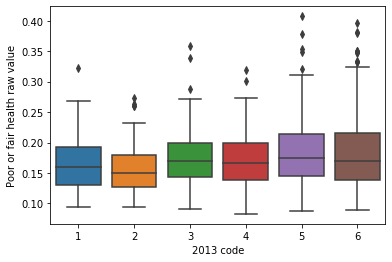

In [24]:
sns.boxplot(x='2013 code', y="Poor or fair health raw value", data=df_sample)
f1 = plt.gcf()

Text(0, 0.5, '# of observations')

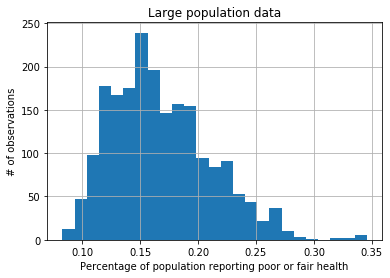

In [25]:
large_hist = large_pop_df['Poor or fair health raw value'].hist(bins=25)
large_hist.set_title('Large population data')
large_hist.set_xlabel('Percentage of population reporting poor or fair health')
large_hist.set_ylabel('# of observations')

Text(0, 0.5, '# of observations')

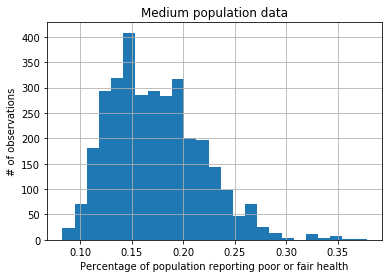

In [26]:
medium_hist = medium_pop_df['Poor or fair health raw value'].hist(bins=25)
medium_hist.set_title('Medium population data')
medium_hist.set_xlabel('Percentage of population reporting poor or fair health')
medium_hist.set_ylabel('# of observations')

Text(0, 0.5, '# of observations')

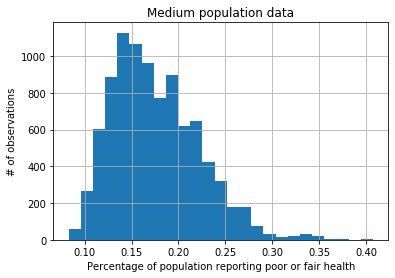

In [27]:
small_hist = small_pop_df['Poor or fair health raw value'].hist(bins=25)
small_hist.set_title('Medium population data')
small_hist.set_xlabel('Percentage of population reporting poor or fair health')
small_hist.set_ylabel('# of observations')

The visuals above show us that the 'Poor or fair health raw value' variable has a skewed right distribution that peaks at 15% of the population reporting a poor or fair health condition for all population sizes.

There are outliers in each population category where counties show about 35% of the population in poor/fair health. The small population category has the largest outlier at 40%.

This analysis shows us that, in general, there is a difference in health conditions across the three population sizes; more rural counties having higher rates of people in poor/fair health classifications.  

In [28]:
pfh_large = large_pop_df['Poor or fair health raw value'].values
pfh_medium = medium_pop_df['Poor or fair health raw value'].values
pfh_small = small_pop_df['Poor or fair health raw value'].values

In [29]:
st_large, p_large = stats.normaltest(pfh_large)
st_medium, p_medium = stats.normaltest(pfh_medium)
st_small, p_small = stats.normaltest(pfh_small)

In [30]:
def check_p_val(p_val, alpha):
    if p_val < alpha:
        return False
    else:
        return True

is_n_large = check_p_val(p_large, .01)
is_n_medium = check_p_val(p_medium, .01)
is_n_small = check_p_val(p_small, .01)

print("The Poor/Fair health variable in large population size counties follows a normal distribution: ", is_n_large)
print("The Poor/Fair health variable in medium population size counties follows a normal distribution: ", is_n_medium)
print("The Poor/Fair health variable in small population size counties follows a normal distribution: ", is_n_small)

The Poor/Fair health variable in large population size counties follows a normal distribution:  False
The Poor/Fair health variable in medium population size counties follows a normal distribution:  False
The Poor/Fair health variable in small population size counties follows a normal distribution:  False


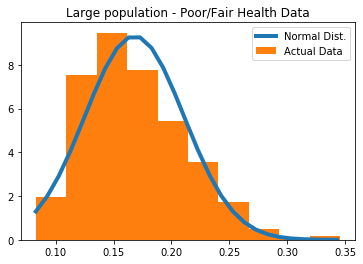

In [31]:
xs = np.arange(pfh_large.min(), pfh_large.max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(pfh_large), np.std(pfh_large))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(pfh_large, density = True, label = 'Actual Data');
plt.title('Large population - Poor/Fair Health Data')
plt.legend();

The code above confirms that the 'Poor or fair health raw value' variable in each population category does not follow normal distributions and are skewed right distributions.

## Life Expectancy

The 'Life Expectancy' variable in our data is the average number of years a person can expect to live..
Source/Description: https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/county-health-rankings-model/health-outcomes/quality-of-life/poor-or-fair-health

Analyzing the mean's of our 3 groupings shows a consistent decline from urban cities life expectancy to rural counties

In [32]:
large_pop_df['Life expectancy raw value'].mean() 

77.63273228477158

In [33]:
medium_pop_df['Life expectancy raw value'].mean() 

77.30433660905616

In [34]:
small_pop_df['Life expectancy raw value'].mean() 

77.13267555040088

Seperating out the populations back into their six original groupings shows an even more drastic difference, with large central metrpolitan cities (1) having a 79.8 life expectancy average which consistently decreases in line with how urban/rural a location is down to 77.1 years in non-core (6) rural neighborhoods. This constitutes a difference of 2.7 years simply based on the grouping of where people live.

In [35]:
df_sample.groupby('2013 code')['Life expectancy raw value'].mean()

2013 code
1    79.789764
2    78.584777
3    77.840751
4    77.813149
5    77.363703
6    77.117909
Name: Life expectancy raw value, dtype: float64

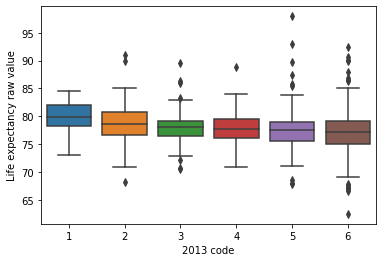

In [36]:
sns.boxplot(x='2013 code', y="Life expectancy raw value", data=df_sample)
f1 = plt.gcf()

In [37]:
df_sample.groupby('2013 code')['Life expectancy raw value'].mean()

2013 code
1    79.789764
2    78.584777
3    77.840751
4    77.813149
5    77.363703
6    77.117909
Name: Life expectancy raw value, dtype: float64

sns.boxplot(x='2013 code', y="Life expectancy raw value", data=df_sample)
f1 = plt.gcf()

## Supplemental Health Indicators

Below we explored health indicators besides general life expectancy and poor/fair health to analyze if trends continue to appear with different indicators. If a decrease is consistently among other health indicators like infant mortality, diabetes, and HIV, it serves as a good indicator that our main variables of life expectancy and self-reported health are good examples of the general health of these communities

### Infant Mortality

Clear increase in infant mortality for more rural counties, with a spike in the most rural counties. This suggests decreased health quality for poorer counties. 

In [38]:
df_sample.groupby('2013 code')['Infant mortality raw value'].mean()

2013 code
1    5.688175
2    5.845090
3    6.782994
4    6.404465
5    7.276575
6    8.572936
Name: Infant mortality raw value, dtype: float64

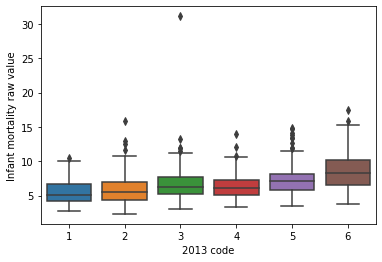

In [39]:
sns.boxplot(x='2013 code', y="Infant mortality raw value", data=df_sample)
f1 = plt.gcf()

### Diabetes

Diabetes seems to have a much lower value for very large cities before holding consistent among all other county types. 

In [40]:
df_sample.groupby('2013 code')['Diabetes prevalence raw value'].mean()

2013 code
1    0.091714
2    0.110060
3    0.111791
4    0.110722
5    0.114730
6    0.118110
Name: Diabetes prevalence raw value, dtype: float64

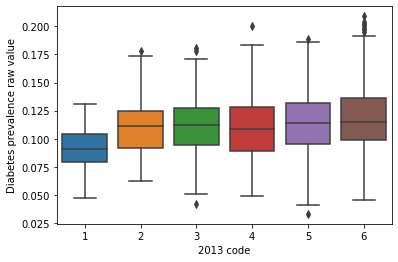

In [41]:
sns.boxplot(x='2013 code', y="Diabetes prevalence raw value", data=df_sample)
f1 = plt.gcf()

## HIV Prevelance

The HIV Prevelance Indicator measures the average amount of people aged 13 and over per 100,000 people who tested positive for HIV: https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/county-health-rankings-model/health-outcomes/quality-of-life/hiv-prevalence

Our analysis below shows the average amount of people with HIV in large cities is 700 compared to an average of roughly 200 across all other counties. This indicator serves as a marker for possible high risk behavior like intravenous drug use and unprotected sex.

In [42]:
df_sample.groupby('2013 code')['HIV prevalence raw value'].mean()

2013 code
1    681.443750
2    208.737681
3    226.398058
4    173.864500
5    145.885329
6    174.835198
Name: HIV prevalence raw value, dtype: float64

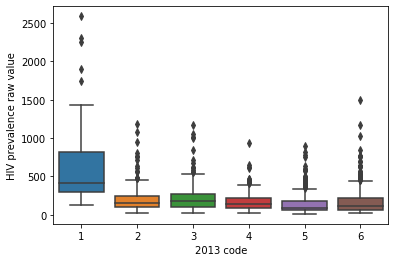

In [43]:
sns.boxplot(x='2013 code', y="HIV prevalence raw value", data=df_sample)
f1 = plt.gcf()

### Side-Note: Residential Segregation/White Flight

While not directly relevant to our original question, it is interesting to note the large spike in non-white populations in vary large cities, indicitive of the "White Flight" of the 1950's and 1960's towards suburban neighborhoods away from large cities as discussed in Cogs 9 and Cogs 108.  

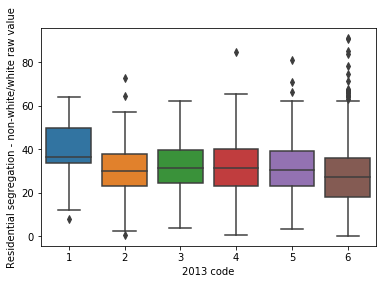

In [44]:
sns.boxplot(x='2013 code', y="Residential segregation - non-white/white raw value", data=df_sample)
f1 = plt.gcf()

## Indicators for Poor Health/Life Expectancy

We wanted to do some basic analysis of the various factors that could be contributing to the disparity between the healths of urban and rural neighborhoods. There are a numerous amount of different factors associated with this and many are outside of the range of our health dataset, often surronding the difference in healthcare infastructure, thus this analysis is purely corrolational and should not be used to demonstrate some type of casual analysis like poor sleep or smoking is causing this disparity. 

An initial look at overall corrolations is extremely convoluted due to the use of positive/negative values and sheer number of variables. 

In [45]:
df_corrs = df_sample[['Poor or fair health raw value', 'Life expectancy raw value', 'Adult obesity raw value', 'Adult smoking raw value', 'Insufficient sleep raw value', 'Excessive drinking raw value', 'Physical inactivity raw value', 'Uninsured raw value', 'Frequent physical distress raw value', 'Frequent mental distress raw value']]
corrs = df_corrs.corr()
corrs

,Poor or fair health raw value,Life expectancy raw value,Adult obesity raw value,Adult smoking raw value,Insufficient sleep raw value,Excessive drinking raw value,Physical inactivity raw value,Uninsured raw value,Frequent physical distress raw value,Frequent mental distress raw value
Poor or fair health raw value,1.000000,-0.589131,0.413209,0.695377,0.636567,-0.634408,0.538820,0.489119,0.925821,0.830065
Life expectancy raw value,-0.589131,1.000000,-0.544049,-0.677550,-0.495112,0.512152,-0.609108,-0.217249,-0.637787,-0.666141
Adult obesity raw value,0.413209,-0.544049,1.000000,0.568765,0.431967,-0.348423,0.707184,0.066437,0.400756,0.414061
Adult smoking raw value,0.695377,-0.677550,0.568765,1.000000,0.616112,-0.396809,0.590453,0.190611,0.793960,0.807747
Insufficient sleep raw value,0.636567,-0.495112,0.431967,0.616112,1.000000,-0.429191,0.468634,0.075392,0.644815,0.663351
Excessive drinking raw value,-0.634408,0.512152,-0.348423,-0.396809,-0.429191,1.000000,-0.541234,-0.345440,-0.634864,-0.633471
Physical inactivity raw value,0.538820,-0.609108,0.707184,0.590453,0.468634,-0.541234,1.000000,0.257062,0.523179,0.522602
Uninsured raw value,0.489119,-0.217249,0.066437,0.190611,0.075392,-0.345440,0.257062,1.000000,0.370173,0.278116
Frequent physical distress raw value,0.925821,-0.637787,0.400756,0.793960,0.644815,-0.634864,0.523179,0.370173,1.000000,0.954229
Frequent mental distress raw value,0.830065,-0.666141,0.414061,0.807747,0.663351,-0.633471,0.522602,0.278116,0.954229,1.000000


To corrolate variables with poor/fair self-reported health, we sort values and set ascending to false as an increase in these values represents more people reporting poor health and a negative impact. We can see that the 3 most-highly corrolated values are frequent physical distress, frequent mental distress, and smoking. 

In [46]:
corrs['Poor or fair health raw value'].sort_values(ascending=False)

Poor or fair health raw value           1.000000
Frequent physical distress raw value    0.925821
Frequent mental distress raw value      0.830065
Adult smoking raw value                 0.695377
Insufficient sleep raw value            0.636567
Physical inactivity raw value           0.538820
Uninsured raw value                     0.489119
Adult obesity raw value                 0.413209
Life expectancy raw value              -0.589131
Excessive drinking raw value           -0.634408
Name: Poor or fair health raw value, dtype: float64

We can use the same formula for life expectancy, but now setting ascending as False as the variables with the highest impact will be negatively corrolated since we are no seeing what decreases people's life expectancy. Doing the same formula for life expectancy, we see that the largest negative contributors to shortening one's life are smoking, frequent mental distress, and frequent physical distress. What's interesting is that these are the exact same 3 top values corrolated with 'Poor or fair health' suggesting how tied together these two values are.

In [47]:
corrs['Life expectancy raw value'].sort_values(ascending=True)

Adult smoking raw value                -0.677550
Frequent mental distress raw value     -0.666141
Frequent physical distress raw value   -0.637787
Physical inactivity raw value          -0.609108
Poor or fair health raw value          -0.589131
Adult obesity raw value                -0.544049
Insufficient sleep raw value           -0.495112
Uninsured raw value                    -0.217249
Excessive drinking raw value            0.512152
Life expectancy raw value               1.000000
Name: Life expectancy raw value, dtype: float64

# Ethics & Privacy

Our main goal while deciding which data to use and what to do with it for this project was to answer our question as thoroughly and accurately as possible without accidentally harming or compromising the privacy of any individuals or groups. We realize that although our intent was clearly to avoid these things, we still had to take the following steps to ensure that loss of privacy or harm was not a biproduct of our work:

1. Carefully check terms and conditions for the data
2. Make sure that we are collecting isn't identifiable to any individual
3. Don't target any specific group on age gender, race, religion, and/or culture, check if our data is biased
4. Make sure any data included in anonymous, and consider using safe harbour method to filter out personal information
5. Make sure that our data is protected and safe in order to prevent being found and/or hacked by someone is not part of this project
6. Carefully discuss in group if there is anything violates ethics and privacy section of the project

For our data frame that we retrieved, the data is already grouped into subsets of populations, and is therefore anonymous and we do not need to do anything else to ensure the privacy of the subjects is protected.

In our analysis of the data, we made sure not to make generalizations about specific populations or to label specific populations as having certain traits, but instead focused on the type of cities they were and what effect that has on the conditions.

# Conclusion & Discussion

Utilizing two datasets provided by CHR and CDC, we sought to answer our question of how residing in various populations have an effect on various health conditions and mortality rates for individuals within those populations. Our initial hypothesis was that individuals living in larger populations would have poorer health and mortality than those living in rural populations.

In our analysis, we separated the populations into three subsets; the first subset being the largest populations, second being medium populations, and last being small populations. The first variable we analyzed was the "Poor or fair raw health value." Contrary to our hypothesis, rural counties reported higher quantities of population in poor or fair health over their large metropolitan counterparts. This is also the same for average life expectancy, however. Large metropolitan counties report similar, but slightly longer life expectancy than rural counties.

Diving deeper into our analysis, we decided to take additional health indicators into account, such as infant mortality, diabetes, and HIV prevalence. Furthermore, we wanted to see if racial distribution within the various populations had any relation to the variables in our analysis. We found that rural counties are afflicted by higher rates of diabetes and infant mortality, while the largest metropolitan counties have substantially higher rates of HIV prevalence. While much of our analysis found poorer and poorer health conditions the more rural a county was, HIV prelance is a notable exception, likely due to high-risk behaviors like unprotected sex and intravanous drug-use, and is an issue most-notably seen in the largest of cities.

Our analysis concludes that larger metropolitan populations are generally healthier than rural populations, with the exception of HIV prevalence. We used corrolation functions to find that the indicators of smoking, mental distress, obesity, insufficient sleep, and being uninsured serve as indicators for decreased self-reported health and life expectancy. Unfortunately, we cannot create a casual relationship between any of these variables.In order to explain the causes for these differences, we would need to perform a much more expansive study with access to a lot more variables in datasets pertaining to healthcare infastructure which are much less readily available then those concerning public health. While this can come from lobbing by large pharmaceutical instutions, it is also a result of the need for privacy for the sensitive nature of this data. It would be far more worrisome if the type of data we would need for extensive studies was made public in the same way census data is at it would raise serious ethical and privacy concerns pertaining users health. 

Our hypothesis was clearly wrong, however it was done before both conducting our own study/reading other studies and created under the belief that the artificial enviroment cities provide would  caused decreased health conditions in people compared to the romanticized view of living away from people and much closer to nature. While we cannot point to the specific elements that cause the health decline, what we can derive from our analysis is that there are clear differences between health indicators between urban and rural populations. We hope that our research brings attention to this so we can eliminate this disparity, because all Americans should have the opportunity for equal health regardless of where they reside.

# Team Contributions

- Sean Reynolds
- Kari Garcia
- Sam Kapusta
- Tam Tran
- Randy Kim